In [1]:
game_rotation_vector_data= [(123, 1.0, -0.05, -0.04, 0.01),
  (162, 1.0, -0.23, 0.76, -2.0),
  (213, 1.0, -0.6, 1.34, -1.69),
  (264, 1.0, -1.52, 1.58, -0.51),
  (314, 1.0, -0.98, 1.07, -0.48),
  (364, 1.0, -1.46, 1.35, -0.29),
  (414, 1.0, -1.95, 3.34, 2.62),
  (464, 1.0, -1.87, 2.82, 3.5),
  (514, 0.99, -1.8, 0.72, 1.64),
  (564, 0.98, -1.82, -1.06, -0.17),
  (612, 0.95, -1.66, -1.02, -0.11),
  (664, 0.88, -1.65, -4.71, -3.56),
  (712, 0.81, -1.26, -2.74, -1.21),
  (765, 0.75, -0.34, -1.98, -4.05),
  (815, 0.73, -0.54, -1.66, -3.94),
  (865, 0.76, -0.66, -2.89, -5.71),
  (914, 0.83, -0.77, -3.14, -5.32),
  (965, 0.91, 0.48, -1.06, -0.11),
  (1013, 0.94, -0.32, 0.79, -6.08),
  (1065, 0.99, -0.27, -1.92, 3.83),
  (1114, 0.99, -1.54, -0.05, -0.35),
  (1164, 0.98, -1.65, -1.44, -4.21),
  (1214, 0.96, -0.73, 0.7, 4.96),
  (1265, 0.94, -0.27, -0.46, 7.82),
  (1313, 0.94, -1.65, 0.39, 4.97),
  (1364, 0.96, -0.64, -1.16, 4.37),
  (1414, 0.99, -0.65, -0.29, 3.8),
  (1464, 0.98, -1.31, -2.71, -1.91),
  (1512, 0.94, -0.36, -1.47, -1.43),
  (1564, 0.87, -1.69, -2.45, -2.11),
  (1614, 0.78, -1.04, -3.09, -1.71),
  (1664, 0.73, -1.33, -2.53, -4.88),
  (1714, 0.75, -1.06, -1.78, -3.72),
  (1764, 0.82, -0.89, -1.95, -5.85),
  (1813, 0.93, -0.97, -2.62, -1.29),
  (1863, 0.99, 0.26, 0.95, -0.29),
  (1912, 0.99, -0.63, -1.68, -2.52),
  (1963, 0.94, -0.1, -1.3, 2.08),
  (2013, 0.92, -1.45, -1.53, 3.32),
  (2063, 0.91, 1.59, -1.18, 7.49),
  (2112, 0.91, -0.96, -0.05, 4.34),
  (2163, 0.95, -1.19, -2.82, 2.75),
  (2213, 0.98, -0.71, -1.26, 2.75),
  (2264, 0.97, -0.96, -2.15, -0.49),
  (2313, 0.9, -0.56, -1.84, 0.21),
  (2360, 0.84, -1.17, -2.23, -1.36),
  (2415, 0.8, -0.3, -0.0, -0.0),
  (4796, 0.99, 0.65, 1.31, 3.44),
  (4838, 0.99, 0.11, 0.48, 0.54),
  (4889, 0.99, -0.07, -0.52, -0.53),
  (4939, 0.99, 0.11, -0.37, 0.36),
  (4990, 0.99, 0.16, -0.12, -0.2)]




<IPython.core.display.Javascript object>


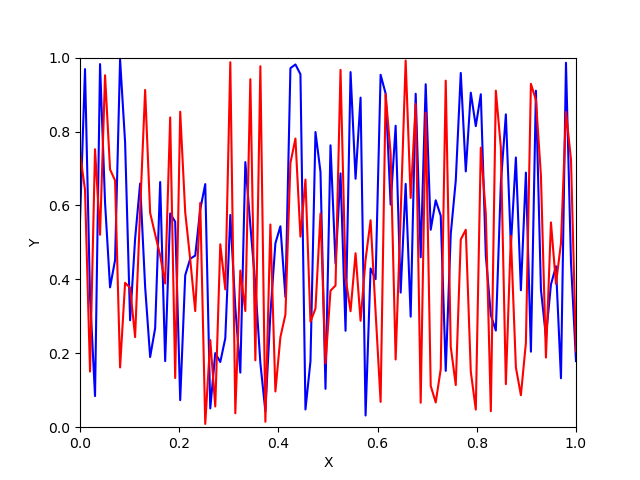

In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

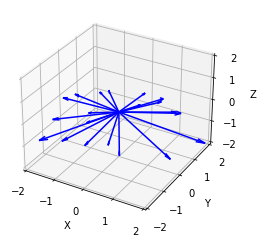

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Convert quaternion to rotation matrix
def quaternion_to_rotation_matrix(q):
    r, i, j, k = q
    R = np.array([
        [1 - 2*(j**2 + k**2), 2*(i*j - k*r), 2*(i*k + j*r)],
        [2*(i*j + k*r), 1 - 2*(i**2 + k**2), 2*(j*k - i*r)],
        [2*(i*k - j*r), 2*(j*k + i*r), 1 - 2*(i**2 + j**2)]
    ])
    return R

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Reference vector
v = np.array([0, 0, 1])

# Plot each rotated vector
for _, r, i, j, k in game_rotation_vector_data:
    R = quaternion_to_rotation_matrix((r, i, j, k))
    v_rot = R @ v
    ax.quiver(0, 0, 0, v_rot[0], v_rot[1], v_rot[2], color='b', arrow_length_ratio=0.1)
#     plt.p

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [7]:
import time
import random

# Function to generate random quaternion data
def generate_fake_data():
    r = 1.0
    i = random.uniform(-1, 1)
    j = random.uniform(-1, 1)
    k = random.uniform(-1, 1)
    timestamp = int(time.time() * 1000)  # current time in milliseconds
    return (timestamp, r, i, j, k)

# Number of data points to generate
num_data_points = 20

# Clear the current game_rotation_vector_data
game_rotation_vector_data.clear()

# Generate and append fake data to game_rotation_vector_data
for _ in range(num_data_points):
    game_rotation_vector_data.append(generate_fake_data())
    time.sleep(0.5)  # simulate a half-second delay between data points

# Create and display the animation
ani = FuncAnimation(fig, update, frames=len(game_rotation_vector_data), init_func=init, blit=True)
plt.show()


NameError: name 'FuncAnimation' is not defined

<IPython.core.display.Javascript object>


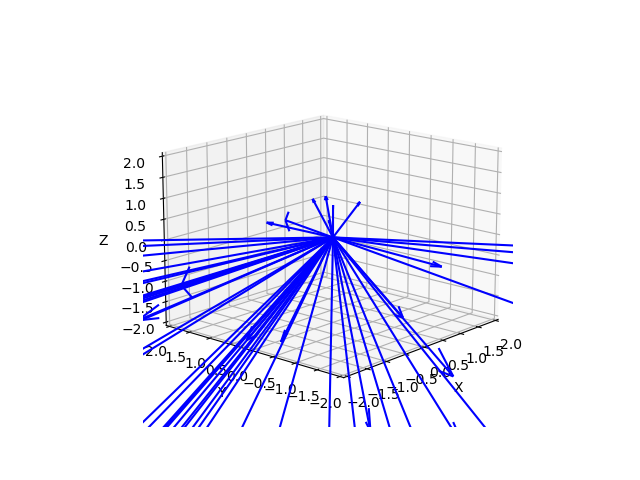

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Convert quaternion to rotation matrix
def quaternion_to_rotation_matrix(q):
    r, i, j, k = q
    R = np.array([
        [1 - 2*(j**2 + k**2), 2*(i*j - k*r), 2*(i*k + j*r)],
        [2*(i*j + k*r), 1 - 2*(i**2 + k**2), 2*(j*k - i*r)],
        [2*(i*k - j*r), 2*(j*k + i*r), 1 - 2*(i**2 + j**2)]
    ])
    return R

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Reference vector
v = np.array([0, 0, 1])

# game_rotation_vector_data
game_rotation_vector_data = [
    (123, 1.0, -0.05, -0.04, 0.01), (162, 1.0, -0.23, 0.76, -2.0),
    (213, 1.0, -0.6, 1.34, -1.69), (264, 1.0, -1.52, 1.58, -0.51),
    (314, 1.0, -0.98, 1.07, -0.48), (364, 1.0, -1.46, 1.35, -0.29),
    (414, 1.0, -1.95, 3.34, 2.62), (464, 1.0, -1.87, 2.82, 3.5),
    (514, 0.99, -1.8, 0.72, 1.64), (564, 0.98, -1.82, -1.06, -0.17),
    (612, 0.95, -1.66, -1.02, -0.11), (664, 0.88, -1.65, -4.71, -3.56),
    (712, 0.81, -1.26, -2.74, -1.21), (765, 0.75, -0.34, -1.98, -4.05),
    (815, 0.73, -0.54, -1.66, -3.94), (865, 0.76, -0.66, -2.89, -5.71),
    (914, 0.83, -0.77, -3.14, -5.32), (965, 0.91, 0.48, -1.06, -0.11),
    (1013, 0.94, -0.32, 0.79, -6.08), (1065, 0.99, -0.27, -1.92, 3.83),
    (1114, 0.99, -1.54, -0.05, -0.35), (1164, 0.98, -1.65, -1.44, -4.21),
    (1214, 0.96, -0.73, 0.7, 4.96), (1265, 0.94, -0.27, -0.46, 7.82),
    (1313, 0.94, -1.65, 0.39, 4.97), (1364, 0.96, -0.64, -1.16, 4.37),
    (1414, 0.99, -0.65, -0.29, 3.8), (1464, 0.98, -1.31, -2.71, -1.91),
    (1512, 0.94, -0.36, -1.47, -1.43), (1564, 0.87, -1.69, -2.45, -2.11),
    (1614, 0.78, -1.04, -3.09, -1.71), (1664, 0.73, -1.33, -2.53, -4.88),
    (1714, 0.75, -1.06, -1.78, -3.72), (1764, 0.82, -0.89, -1.95, -5.85),
    (1813, 0.93, -0.97, -2.62, -1.29), (1863, 0.99, 0.26, 0.95, -0.29),
    (1912, 0.99, -0.63, -1.68, -2.52), (1963, 0.94, -0.1, -1.3, 2.08),
    (2013, 0.92, -1.45, -1.53, 3.32), (2063, 0.91, 1.59, -1.18, 7.49),
    (2112, 0.91, -0.96, -0.05, 4.34), (2163, 0.95, -1.19, -2.82, 2.75),
    (2213, 0.98, -0.71, -1.26, 2.75), (2264, 0.97, -0.96, -2.15, -0.49),
    (2313, 0.9, -0.56, -1.84, 0.21), (2360, 0.84, -1.17, -2.23, -1.36),
    (2415, 0.8, -0.3, -0.0, -0.0), (4796, 0.99, 0.65, 1.31, 3.44),
    (4838, 0.99, 0.11, 0.48, 0.54), (4889, 0.99, -0.07, -0.52, -0.53),
    (4939, 0.99, 0.11, -0.37, 0.36), (4990, 0.99, 0.16, -0.12, -0.2)
]

## Continue plotting each rotated vector
for _, r, i, j, k in game_rotation_vector_data:
    R = quaternion_to_rotation_matrix((r, i, j, k))
    v_rot = R @ v
    ax.quiver(0, 0, 0, v_rot[0], v_rot[1], v_rot[2], color='b', arrow_length_ratio=0.1)
    time.sleep(0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [12]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [13]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


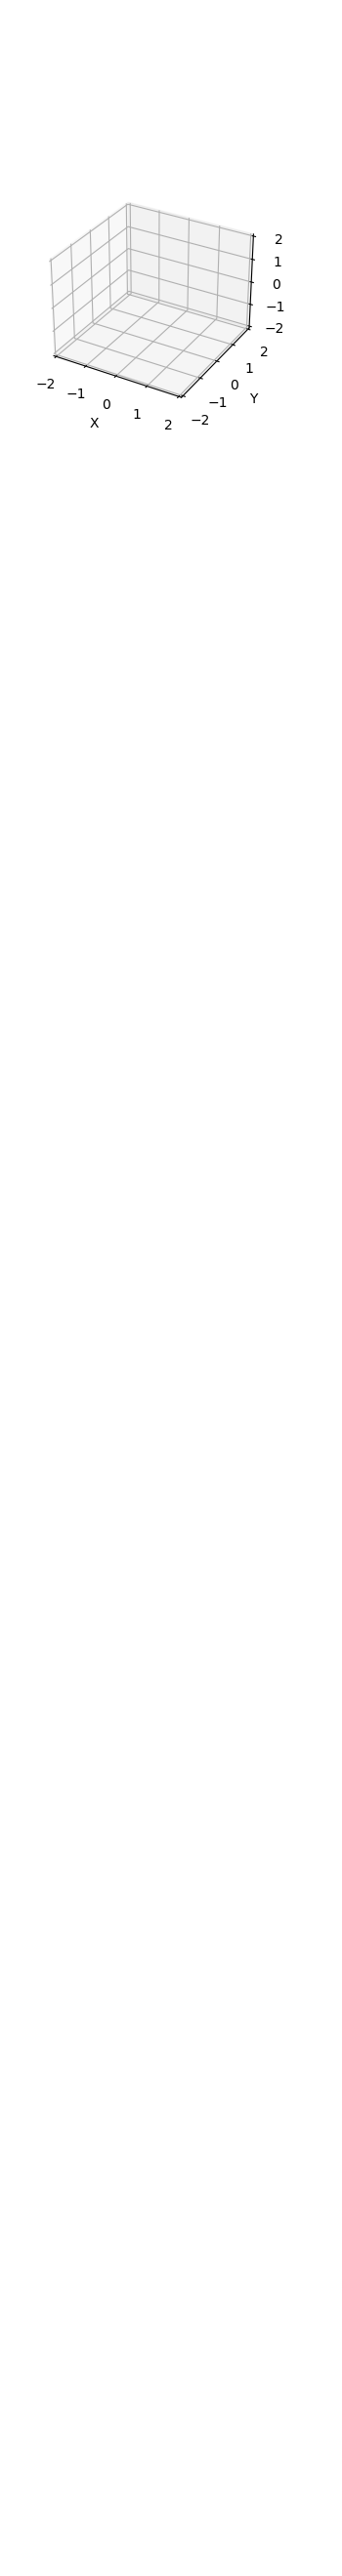

In [11]:
from IPython.display import display, clear_output

# Initialize the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set axis limits
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display each rotated vector one by one
for _, r, i, j, k in game_rotation_vector_data:
    R = quaternion_to_rotation_matrix((r, i, j, k))
    v_rot = R @ v
    ax.quiver(0, 0, 0, v_rot[0], v_rot[1], v_rot[2], color='b', arrow_length_ratio=0.1)
    display(fig)
    clear_output(wait=True)
    ax.cla()  # Clear the axes for the next vector
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Show the last vector at the end
plt.show()


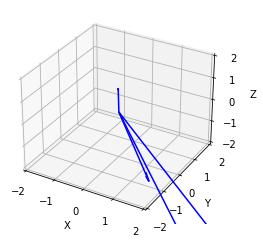

In [14]:
# Given code

# Importing necessary libraries and setup
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

# Provided data
game_rotation_vector_data= [
    (123, 1.0, -0.05, -0.04, 0.01),
    (162, 1.0, -0.23, 0.76, -2.0),
    (213, 1.0, -0.6, 1.34, -1.69),
    (264, 1.0, -1.52, 1.58, -0.51)
]

# Quaternion to rotation matrix conversion function
def quaternion_to_rotation_matrix(q):
    r, i, j, k = q
    R = np.array([
        [1 - 2*(j**2 + k**2), 2*(i*j - k*r), 2*(i*k + j*r)],
        [2*(i*j + k*r), 1 - 2*(i**2 + k**2), 2*(j*k - i*r)],
        [2*(i*k - j*r), 2*(j*k + i*r), 1 - 2*(i**2 + j**2)]
    ])
    return R

# Plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Reference vector
v = np.array([0, 0, 1])

# Plotting each rotated vector
for _, r, i, j, k in game_rotation_vector_data:
    R = quaternion_to_rotation_matrix((r, i, j, k))
    v_rot = R @ v
    ax.quiver(0, 0, 0, v_rot[0], v_rot[1], v_rot[2], color='b', arrow_length_ratio=0.1)

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


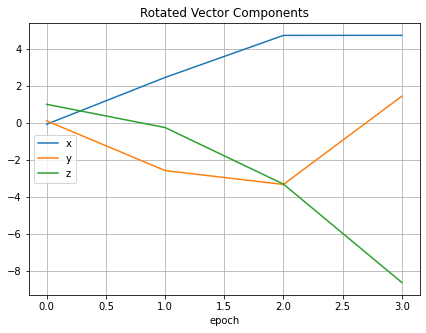

In [16]:
# Importing necessary libraries and setup
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

# Provided data
game_rotation_vector_data= [
    (123, 1.0, -0.05, -0.04, 0.01),
    (162, 1.0, -0.23, 0.76, -2.0),
    (213, 1.0, -0.6, 1.34, -1.69),
    (264, 1.0, -1.52, 1.58, -0.51)
]

# Quaternion to rotation matrix conversion function
def quaternion_to_rotation_matrix(q):
    r, i, j, k = q
    R = np.array([
        [1 - 2*(j**2 + k**2), 2*(i*j - k*r), 2*(i*k + j*r)],
        [2*(i*j + k*r), 1 - 2*(i**2 + k**2), 2*(j*k - i*r)],
        [2*(i*k - j*r), 2*(j*k + i*r), 1 - 2*(i**2 + j**2)]
    ])
    return R

# Reference vector
v = np.array([0, 0, 1])

# Initialize data dictionary
data = collections.defaultdict(list)

# Generate rotated vectors and plot them
for _, r, i, j, k in game_rotation_vector_data:
    R = quaternion_to_rotation_matrix((r, i, j, k))
    v_rot = R @ v
    data['x'].append(v_rot[0])
    data['y'].append(v_rot[1])
    data['z'].append(v_rot[2])
    live_plot(data, title='Rotated Vector Components')
